In [1]:
import sys 
print(sys.executable)

c:\Users\HITECH\Desktop\Image processing\kapda\Scripts\python.exe


In [2]:
import tensorflow as tf
from tensorflow import keras 

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
import matplotlib.pyplot as plt

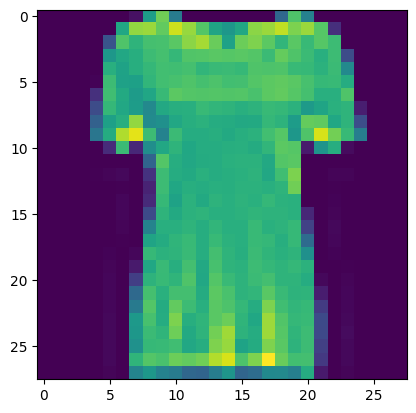

In [6]:
plt.imshow(X_train_full[10])

In [7]:
y_train_full[10]

0

In [8]:
class_names = ["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [9]:
X_train_n = X_train_full/255.
X_test_n=X_test_full/255.

NameError: name 'X_test_full' is not defined

In [11]:
X_valid , X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [12]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
import numpy as np

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

c:\Users\HITECH\Desktop\Image processing\kapda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import pydot
keras.utils.plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [18]:
keras.utils.plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [20]:
weights,biases = model.layers[1].get_weights()

In [21]:
weights

array([[-0.07286898,  0.02020382,  0.05275123, ...,  0.04182386,
         0.00632081,  0.00401095],
       [ 0.03273601,  0.06806797,  0.06325889, ..., -0.01050821,
        -0.07244626, -0.01999216],
       [-0.02627698, -0.05723581, -0.03349625, ..., -0.07396702,
        -0.04883476,  0.03274562],
       ...,
       [-0.0488829 ,  0.04574285,  0.00971449, ...,  0.02317846,
        -0.02082298, -0.05178943],
       [ 0.03566543,  0.04967105,  0.0074687 , ...,  0.05964927,
        -0.06980389,  0.01858361],
       [-0.0011526 , -0.0162408 , -0.06101461, ..., -0.0270054 ,
         0.01588109,  0.05979088]], dtype=float32)

In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [23]:
model_history = model.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6820 - loss: 0.9974 - val_accuracy: 0.8178 - val_loss: 0.5232
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8243 - loss: 0.5035 - val_accuracy: 0.8390 - val_loss: 0.4592
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8421 - loss: 0.4489 - val_accuracy: 0.8518 - val_loss: 0.4251
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8537 - loss: 0.4188 - val_accuracy: 0.8592 - val_loss: 0.4037
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8600 - loss: 0.3976 - val_accuracy: 0.8644 - val_loss: 0.3880
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8655 - loss: 0.3809 - val_accuracy: 0.8670 - val_loss: 0.3751
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8695 - loss: 0.3668 - val_accuracy: 0.8704 - val_loss: 0.3647
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8745 - loss: 0.3549 - 

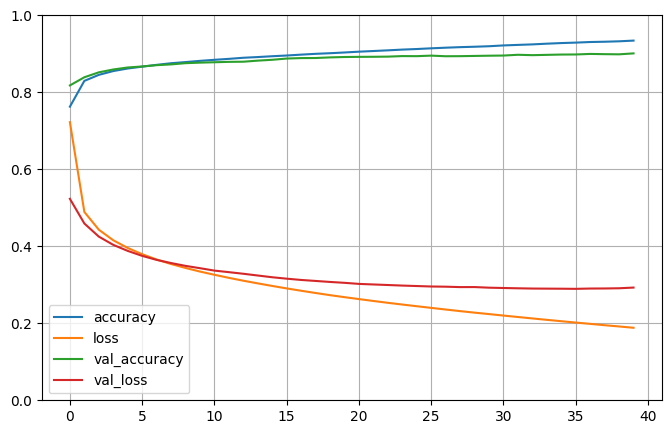

In [24]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

FOR EVALUATING AND FOR PREDICTION

In [28]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8486 - loss: 66.3515


[68.13176727294922, 0.8432000279426575]

In [29]:
X_new = X_test[:3]

In [30]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [36]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trousers'], dtype='<U10')

AxesImage(shape=(28, 28))


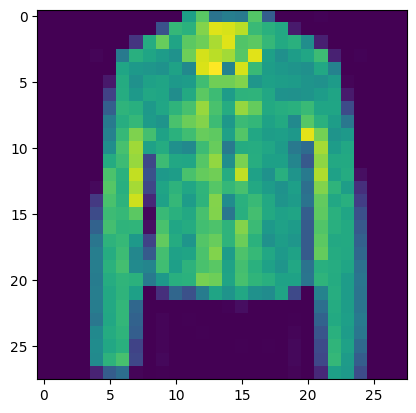

In [40]:
print(plt.imshow(X_test[10]))